In [3]:
# 练习
"""
原代码: http://localhost:8888/notebooks/Titanic-checkpoint.ipynb
1. get_dummy用法 (注意train,test进行get_dummy后的特征项补全)；  https://blog.csdn.net/qq_42828404/article/details/81366427
2. df.plot/ Series.plot方法，注意哪个做横轴，哪个做纵轴；
3. 原代码中对年龄的补全(选取部分特征或全部特征)；
4. 注意df.filter的用法
5. 关于标记的用法:即在空白部分的大量文字注释
6. 关于标题的用法(见后)
7. NBCover:以代码框的形式写下注释
"""

import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame

data_train = pd.read_csv("./data/train.csv")
data_train.columns
data_test = pd.read_csv("./data/test.csv")
data_test.columns
#data_train[data_train.Cabin.notnull()]['Survived'].value_counts()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# 让pandas告知一些数据基本信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
# 注意这里直接进行plot的绘图方法
# data_train.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"获救情况 (1为获救)") # puts a title on our graph
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"Age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)")

# 注意colspan=2
plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()
 

<Figure size 640x480 with 5 Axes>

Survived_0:
  3    372
2     97
1     80
Name: Pclass, dtype: int64
Survived_1: 
 1    136
3    119
2     87
Name: Pclass, dtype: int64
df: 
    Survived  Unsurvived
1       136          80
2        87          97
3       119         372


<Figure size 432x288 with 0 Axes>

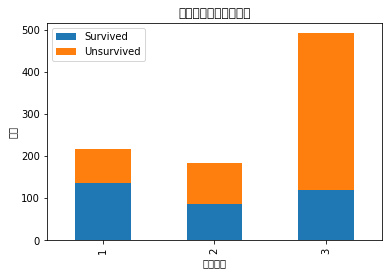

In [7]:
#看看各乘客等级的获救情况
# 统计不同plcass下旅客获救的比例

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
# 查看survived=0的pclass统计
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
print ("Survived_0:\n ", Survived_0)
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
print ("Survived_1: \n", Survived_1)
df=pd.DataFrame({u'Survived':Survived_1, u'Unsurvived':Survived_0})
print ("df: \n", df)
# 注意这里df直接绘图的方法
# 注意stack=True做比例图的方法
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

<Figure size 432x288 with 0 Axes>

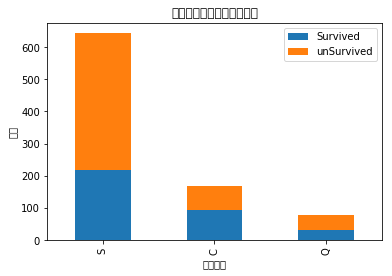

In [8]:
#看看各登录港口的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 对survice=0的数据进行Embarked的情况进行统计
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'unSurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

<Figure size 432x288 with 0 Axes>

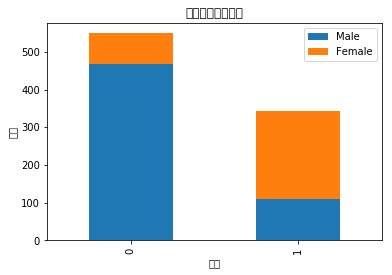

In [9]:
#看看各性别的获救情况
# 统计 活下来/死去 的人中的男女比例
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
# 男性中获救的人数比例
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'Male':Survived_m, u'Female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

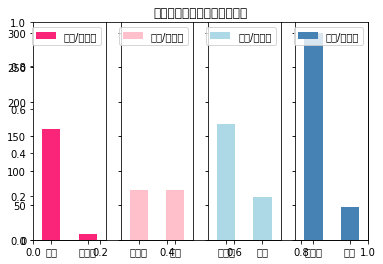

In [10]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

In [11]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [12]:
g = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [14]:
# QUESTION: 对test做dummy时怎么和train一致呢？

# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示
# print ("Cabin index: "data_train['Cabin'].index)
print ("data_train.index: ", data_train.index)
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
print ("dummies_Cabin columns: ",dummies_Cabin.columns)
print ("dummies_Cabin index: ",dummies_Cabin.index)

# 注意，对data_test和data_train要互相进行get_dummies补全
test_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
print ("test_Cabin columns: ",test_Cabin.columns)

# dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

# dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

# dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

# df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
# df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
# df

data_train.index:  RangeIndex(start=0, stop=891, step=1)
dummies_Cabin columns:  Index(['Cabin_A10', 'Cabin_A14', 'Cabin_A16', 'Cabin_A19', 'Cabin_A20',
       'Cabin_A23', 'Cabin_A24', 'Cabin_A26', 'Cabin_A31', 'Cabin_A32',
       ...
       'Cabin_E8', 'Cabin_F E69', 'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2',
       'Cabin_F33', 'Cabin_F38', 'Cabin_F4', 'Cabin_G6', 'Cabin_T'],
      dtype='object', length=147)
dummies_Cabin index:  RangeIndex(start=0, stop=891, step=1)
test_Cabin columns:  Index(['Cabin_A11', 'Cabin_A18', 'Cabin_A21', 'Cabin_A29', 'Cabin_A34',
       'Cabin_A9', 'Cabin_B10', 'Cabin_B11', 'Cabin_B24', 'Cabin_B26',
       'Cabin_B36', 'Cabin_B41', 'Cabin_B45', 'Cabin_B51 B53 B55',
       'Cabin_B52 B54 B56', 'Cabin_B57 B59 B63 B66', 'Cabin_B58 B60',
       'Cabin_B61', 'Cabin_B69', 'Cabin_B71', 'Cabin_B78', 'Cabin_C101',
       'Cabin_C105', 'Cabin_C106', 'Cabin_C116', 'Cabin_C130', 'Cabin_C132',
       'Cabin_C22 C26', 'Cabin_C23 C25 C27', 'Cabin_C28', 'Cabin_C31',
   

这是对标记的测试

In [15]:
print ("test...")

test...


## 这是标记测试，遵循Markdown语法

<font color="color=#0099ff">这里是紫色字体,通过HTML中的font标签的color可以设置字体颜色</font>
    
 关于字体颜色，可以参见这个链接https://blog.csdn.net/HDOJ_lin/article/details/75707141